In [1]:
from ximea import xiapi
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
from tqdm import tqdm_notebook


class camera_ximea:
    def __init__(self, number):
        self.number = number
        self.cam = xiapi.Camera()
        self.img = xiapi.Image()
        self.photo = None
        self.line = "./images_for_stereocalibration/"+ self.number + "/"
        
    def open_device(self):
        self.cam.open_device_by_SN(self.number)
        #print('Opening camera: ' + self.number)
        
    def set_exp(self):
        self.cam.set_exposure(10000)
        
    def start_asq(self):
        self.cam.start_acquisition()
        #print('Starting data acquisition...')
        
    def save_image(self, name_image):
        self.cam.get_image(self.img)
        data_numpy = self.img.get_image_data_numpy()
        im = Image.fromarray(data_numpy)
        #line = "./images_for_stereocalibration/"+ self.number + "/"
        im.save(self.line + name_image + ".png")
        #print('Image number: ' + str(i))
        #print('Image width (pixels):  ' + str(img.width))
        #print('Image height (pixels): ' + str(img.height))
        #print('First 10 pixels: ' + str(data[:10]))
        #print('\n')
        
    def get_image(self):
        self.cam.get_image(self.img)
        data_numpy = self.img.get_image_data_numpy()
        im = Image.fromarray(data_numpy)
        return im
    
    def make_photo(self, name_image):
        self.open_device()
        self.set_exp()
        self.start_asq()
        self.save_image(name_image)
        self.stop_asq()
        self.close_device()
        
    def stop_asq(self):
        self.cam.stop_acquisition()
        #print('Stopping acquisition...')
        
    def close_device(self):
        self.cam.close_device()
        print('Done.')
    
    def show_me(self):
        self.open_device()
        self.set_exp()
        self.start_asq()
        plt.imshow(self.get_image())
        plt.show()
        self.stop_asq()
        self.close_device()
        
    def start_cam(self):
        self.open_device()
        self.set_exp()
        self.start_asq()
        
    def stop_cam(self):
        self.stop_asq()
        self.close_device()
    
    def save_photo(self,name_image):
        #line = "./images_for_stereocalibration/"+ self.number + "/"
        self.photo.save(self.line + name_image + ".png")
        
        
class double_cam:
    def __init__(self, left_cam_number, right_cam_number):
        self.left_cam = camera_ximea(name_left)
        self.right_cam = camera_ximea(name_right)
        
    def make_double_photo(self, name_left_photo, name_right_photo):
        self.left_cam.make_photo(name_left_photo)
        self.right_cam.make_photo(name_right_photo)
    def quick_get_image(self):
        return (self.left_cam.get_image(), self.right_cam.get_image())
    
    def quick_save_image(self, name_left_photo, name_right_photo):
        self.left_cam.save_image(name_left_photo)
        self.rgiht_cam.save_image(name_right_photo)
        
    def start_cams(self):
        self.left_cam.start_cam()
        self.right_cam.start_cam()
        
    def stop_cams(self):
        self.left_cam.stop_cam()
        self.right_cam.stop_cam()
        
    def show_me(self):
        fx, plots = plt.subplots(1, 2, figsize=(20,10))
        clear_output()
        self.left_cam.start_cam()
        plots[0].set_title("Left camera")
        self.left_cam.photo = self.left_cam.get_image()
        plots[0].imshow(self.left_cam.get_image())
        self.left_cam.stop_cam()
        
        self.right_cam.start_cam()
        plots[1].set_title("Right camera")
        self.right_cam.photo = self.right_cam.get_image()
        plots[1].imshow(self.right_cam.photo)
        self.right_cam.stop_cam()
        plt.show()
    def save_photos(self, name_left_photo, name_right_photo):
        self.left_cam.save_photo(name_left_photo)
        self.right_cam.save_photo(name_right_photo)


In [2]:
name_left = "25797059"
name_right = "25791059"
d_c = double_cam(name_left, name_right)

In [3]:
#d_c.start_cams()
t = 0

Done.
Done.


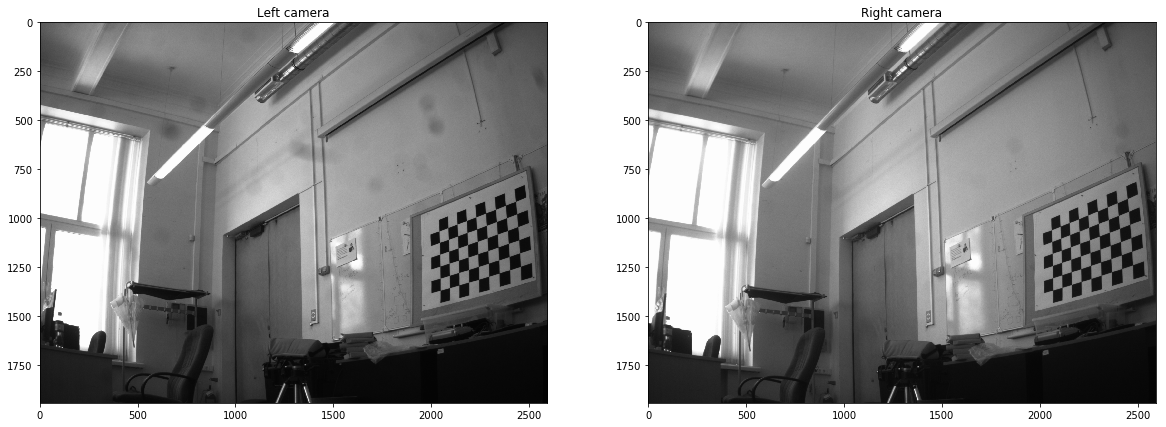

1
i:  9
Продолжить? 1/0
1


In [57]:
a = 0
for i in tqdm_notebook(range(10)):
    while (a != 1):
        d_c.show_me()
        a = int(input())
        if a == 1:
            print("i: ",i)
            d_c.save_photos(str(t), str(t))
            t += 1
        print("Продолжить? 1/0")
        p = int(input())
        if p == 0:
            break

        
            
    a = 0

In [58]:
#d_c.stop_cams()

In [59]:
#d_c.left_cam.stop_cam()

In [60]:
#d_c.right_cam.stop_cam()

In [61]:
t

304